<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Day 7- Group Exercises: Advanced
# Regression Analysis and Feature Selection

Perform regression analysis on a dataset with over 1000 data points and at least 30 features. Apply preprocessing,
build models, evaluate performance, and enhance the model using feature selection methods. Demonstrate
creativity with additional techniques or insights


dataset source:https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
pip install ucimlrepo

import dataset:Predict Students' Dropout and Academic Success

+Instances
4424

+Features
36

In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
y.head()
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


 1. Preprocessing
  1. Handle missing values and outliers.
  2. Scale features using standardization or normalization.
  3. Perform feature selection.

In [13]:
import pandas as pd


numerical_cols = X.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if X[col].isnull().any():
        mean_val = X[col].mean()
        X[col].fillna(mean_val, inplace=True)

categorical_cols = X.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    if X[col].isnull().any():
        mode_val = X[col].mode()[0]
        X[col].fillna(mode_val, inplace=True)

if X.isnull().any().any():
    print("There are still missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler()
X.loc[:, numerical_cols] = scaler.fit_transform(X.loc[:, numerical_cols])
encoder = LabelEncoder()
y.loc[:, 'Target'] = encoder.fit_transform(y.loc[:, 'Target'])
scaler = MinMaxScaler()
y.loc[:, 'Target'] = scaler.fit_transform(y.loc[:, 'Target'].values.reshape(-1, 1))



<ipython-input-38-b003e6c219a3>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y.loc[:, 'Target'] = scaler.fit_transform(y.loc[:, 'Target'].values.reshape(-1, 1))


Feature selection using correlation

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target_column = 'Target'

correlations = X.corrwith(y[target_column])

# threshold
correlation_threshold = 0.1

selected_features = correlations[abs(correlations) > correlation_threshold].index

X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y[target_column], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("\nSelected Features:")
print(selected_features)
X_selected.head()


Mean Squared Error: 0.08985103717349253
R-squared: 0.5596050064287472

Selected Features:
Index(['Application mode', 'Previous qualification (grade)', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


,Application mode,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0.285714,0.284211,0.340000,1,0,1,1,0,0.056604,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
1,0.250000,0.684211,0.500000,1,0,0,1,0,0.037736,0.230769,0.230769,0.741722,0.26087,0.30,0.735897
2,0.000000,0.284211,0.313684,1,0,0,1,0,0.037736,0.230769,0.000000,0.000000,0.26087,0.00,0.000000
3,0.285714,0.284211,0.258947,1,0,1,0,0,0.056604,0.230769,0.230769,0.711447,0.26087,0.25,0.667692
4,0.678571,0.052632,0.489474,0,0,1,0,0,0.528302,0.230769,0.192308,0.653422,0.26087,0.30,0.700000


an R-squared of 0.56 indicates that there's still a significant portion of the variance in student performance that's not explained by the model.
there is room for improvement.

2. Build and Evaluate Models
 1. Train a Linear Regression model.
 2. Evaluate using R² Score andRMSE.
 3. PerformK-Fold Cross-Validation (e.g., 5-fold).

Mean Squared Error: 0.08985103717349253
R-squared: 0.5596050064287472


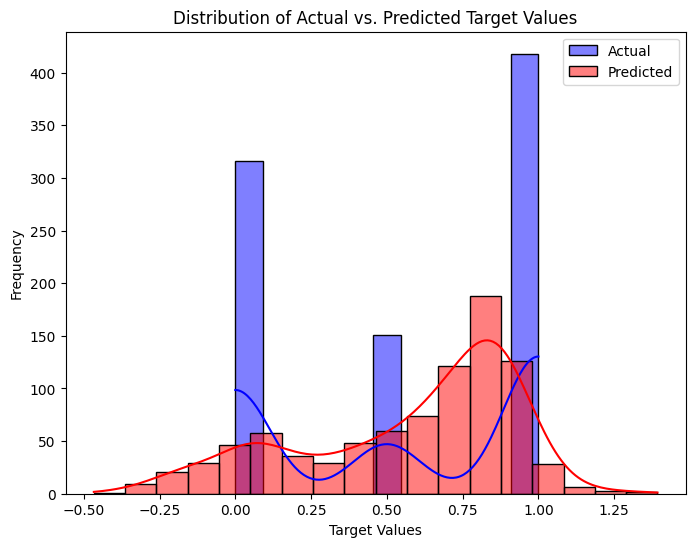

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_selected, y['Target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



plt.figure(figsize=(8, 6))
sns.histplot(y_test, label='Actual', kde=True, color='blue')
sns.histplot(y_pred, label='Predicted', kde=True, color='red')
plt.xlabel("Target Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs. Predicted Target Values")
plt.legend()
plt.show()

Mean Squared Error scores: [0.08913090914147778, 0.0807772465982489, 0.09375308299384481, 0.094163657236773, 0.0716997971112893, 0.0754999114977114, 0.09738910110045389, 0.07343152618799836, 0.08726987211690719, 0.07829709764170521, 0.07798816841359499, 0.0846093554526135, 0.08101531958949572, 0.07160010633326877, 0.08774432520750697, 0.09225644956113868, 0.07886659491590366, 0.08842112228632708, 0.07851022009406124, 0.07203412810797788]
R-squared scores: [0.5455485489211058, 0.5952288125519841, 0.5669304831859177, 0.5339196863254874, 0.6031403229020307, 0.5982249752168531, 0.5209164438890801, 0.6198559361335494, 0.54116499014351, 0.5963149428989207, 0.605528155189686, 0.5640692515785543, 0.6007799804196579, 0.6307069229185089, 0.577218903224994, 0.518111624724285, 0.6160363474593651, 0.5619216845621322, 0.581315973181848, 0.614631814346706]
Average Mean Squared Error: 0.08272289957941494
Average R-squared: 0.5795782899887088


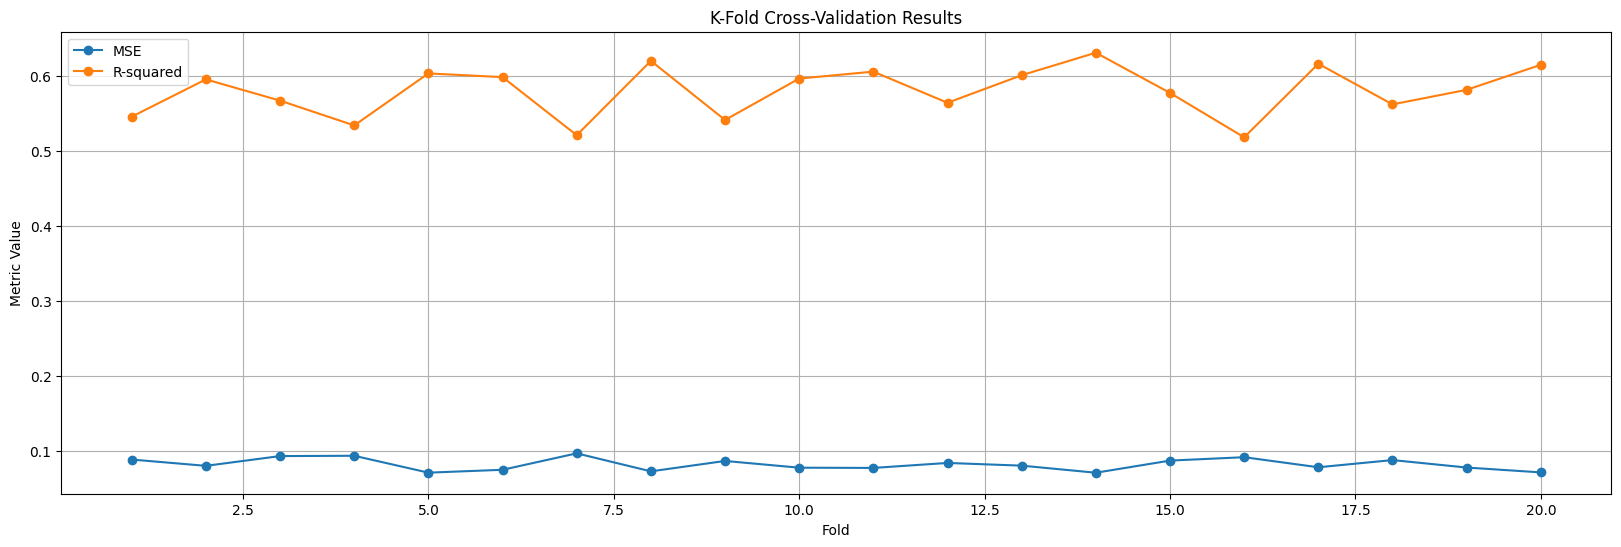

In [61]:

from sklearn.model_selection import KFold
import numpy as np
#20 fold cross validation

kf = KFold(n_splits=20, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y['Target'].iloc[train_index], y['Target'].iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

print("Mean Squared Error scores:", mse_scores)
print("R-squared scores:", r2_scores)
print(f"Average Mean Squared Error: {np.mean(mse_scores)}")
print(f"Average R-squared: {np.mean(r2_scores)}")


plt.figure(figsize=(20, 6))
plt.plot(range(1, len(r2_scores) + 1), mse_scores, marker='o', label='MSE')
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', label='R-squared')
plt.xlabel('Fold')
plt.ylabel('Metric Value')
plt.title('K-Fold Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()

3. Enhance the Model
 1. Experiment with feature selection techniques and analyze their impact.
 2. Visualize results (e.g., feature importance, residual plots).

 Wrapper Methods:
 Recursive Feature Elimination (RFE)

Selected Features using RFE:
Index(['Application mode', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)'],
      dtype='object')

Mean Squared Error (RFE): 0.09090374553670792
R-squared (RFE): 0.5544452719678588


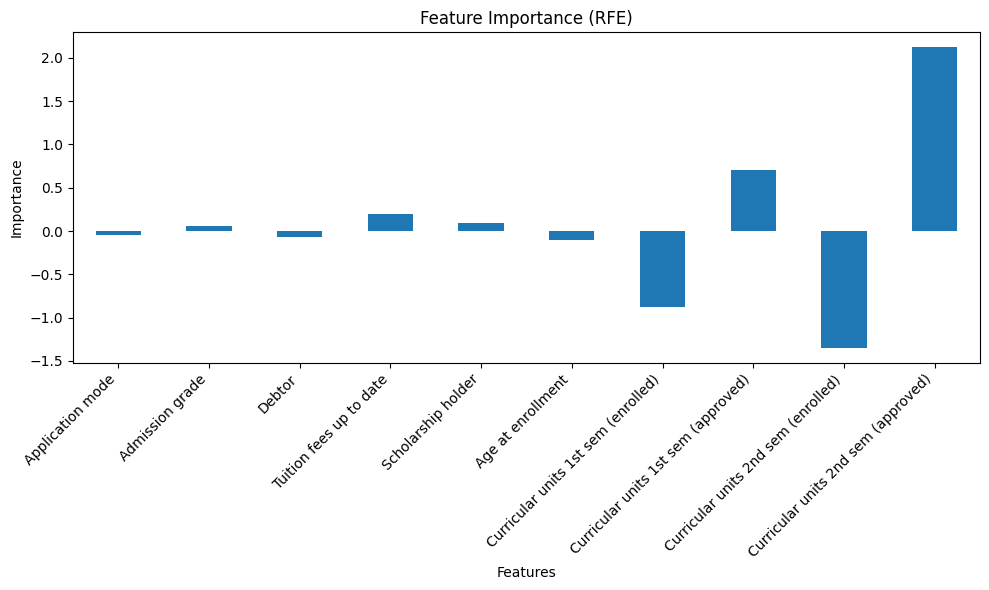

,Tuition fees up to date,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved)
0,1,0.000000,0.000000,0.00000,0.00
1,0,0.230769,0.230769,0.26087,0.30
2,0,0.230769,0.000000,0.26087,0.00
3,1,0.230769,0.230769,0.26087,0.25
4,1,0.230769,0.192308,0.26087,0.30


In [68]:
from sklearn.feature_selection import RFE

num_features_to_select = 10

rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

rfe = rfe.fit(X_selected, y['Target'])

selected_features_rfe = X_selected.columns[rfe.support_]

print("Selected Features using RFE:")
print(selected_features_rfe)

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_selected[selected_features_rfe], y['Target'], test_size=0.2, random_state=42
)

model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = model_rfe.predict(X_test_rfe)

mse_rfe = mean_squared_error(y_test_rfe, y_pred_rfe)
r2_rfe = r2_score(y_test_rfe, y_pred_rfe)

print(f"\nMean Squared Error (RFE): {mse_rfe}")
print(f"R-squared (RFE): {r2_rfe}")

importances = model_rfe.coef_
feature_importance = pd.Series(importances, index=selected_features_rfe)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (RFE)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
X_selected_rfe.head()

Residuals visualization:

Residual = Observed value – Predicted value



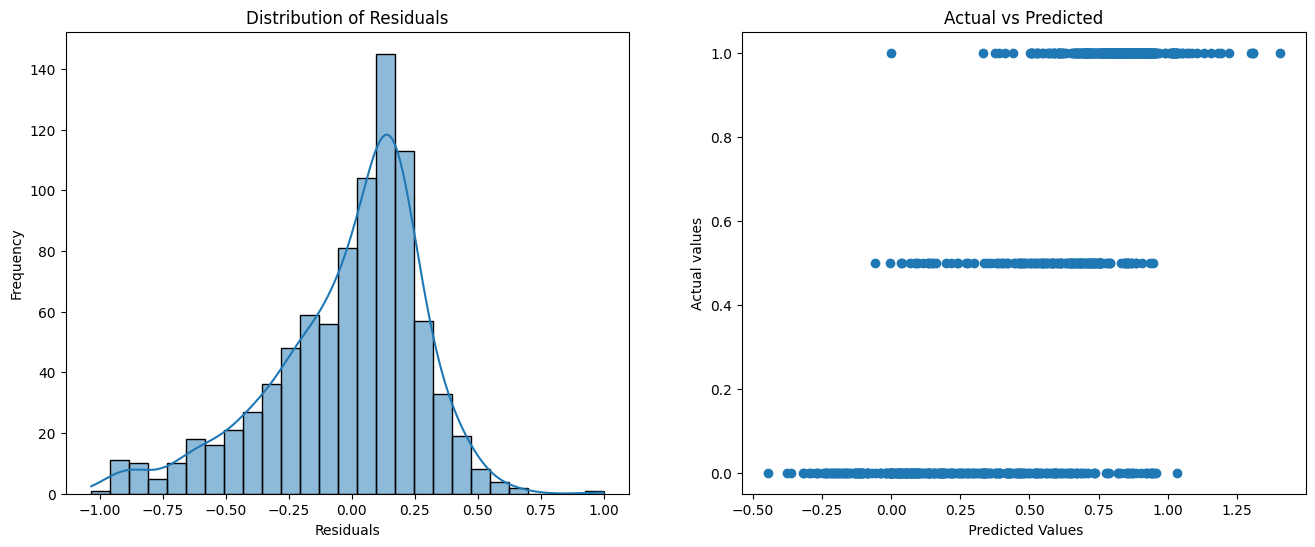

In [88]:
residuals = y_test_rfe - y_pred_rfe

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Residuals")


axes[1].scatter(y_pred_rfe,y_test_rfe)
axes[1].set_xlabel(" Predicted Values")
axes[1].set_ylabel("Actual values")
axes[1].set_title("Actual vs Predicted")

plt.show()

The center of the distribution seems to be around 0.This indicates that, on average, the model's predictions are neither consistently **overestimating** nor **underestimating** the actual values.
the presence of clusters in the second graph indicates that the model lack the capacity to capture the full range of variation in the actual values.
=> the model is limited


 4. Creativity
   1. Try advanced models (e.g., Ridge, Lasso, Polynomial).
   2. Create insightful visualizations or optimize hyperparameters.
   3. Put the nice text justification on your shared colab


Mean Squared Error (Ridge): 0.0909012674359537
R-squared (Ridge): 0.5544574181066242


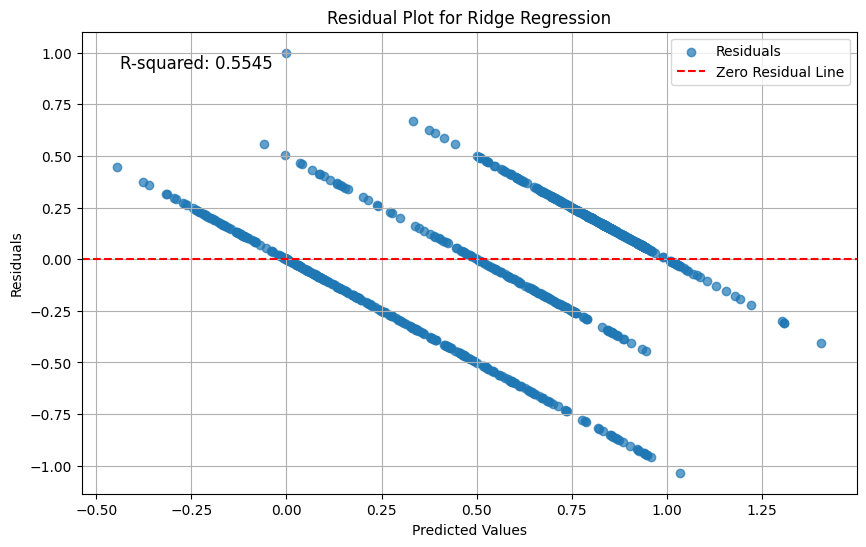

In [115]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_selected[selected_features_rfe], y['Target'], test_size=0.2, random_state=42
)

# Ridge Regression
alpha = 0.01
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_rfe, y_train_rfe)

y_pred_ridge = ridge_model.predict(X_test_rfe)

mse_ridge = mean_squared_error(y_test_rfe, y_pred_ridge)
r2_ridge = r2_score(y_test_rfe, y_pred_ridge)

print(f"\nMean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")

# Residuals visualization
residuals_ridge = y_test_rfe - y_pred_ridge

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, label='Residuals', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Ridge Regression")
plt.legend()
plt.grid(True)

# Add accuracy metric to the plot
accuracy_text = f"R-squared: {r2_ridge:.4f}"
plt.text(0.05, 0.95, accuracy_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()


Mean Squared Error (Lasso): 0.11435220098688913
R-squared (Lasso): 0.4395152420863021


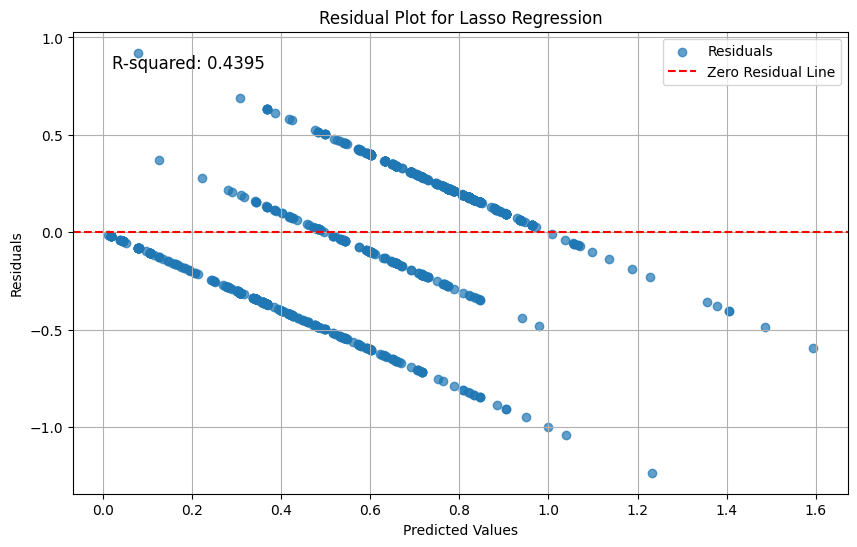

In [114]:

from sklearn.linear_model import Lasso


# Lasso Regression
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_rfe, y_train_rfe)

y_pred_lasso = lasso_model.predict(X_test_rfe)

mse_lasso = mean_squared_error(y_test_rfe, y_pred_lasso)
r2_lasso = r2_score(y_test_rfe, y_pred_lasso)

print(f"\nMean Squared Error (Lasso): {mse_lasso}")
print(f"R-squared (Lasso): {r2_lasso}")

# Residuals visualization
residuals_lasso = y_test_rfe - y_pred_lasso

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals_lasso, label='Residuals', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.legend()
plt.grid(True)

# Accuracy metric
accuracy_text = f"R-squared: {r2_lasso:.4f}"
plt.text(0.05, 0.95, accuracy_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


Mean Squared Error (Polynomial): 0.08284510106004299
R-squared (Polynomial): 0.5939438330767435


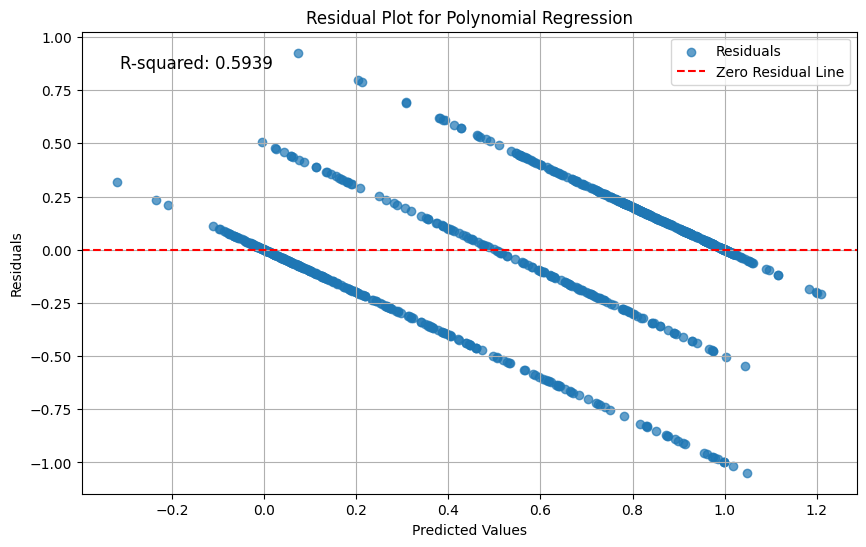

In [116]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train_rfe, y_train_rfe)

y_pred_poly = poly_model.predict(X_test_rfe)

mse_poly = mean_squared_error(y_test_rfe, y_pred_poly)
r2_poly = r2_score(y_test_rfe, y_pred_poly)

print(f"\nMean Squared Error (Polynomial): {mse_poly}")
print(f"R-squared (Polynomial): {r2_poly}")

# Residuals visualization
residuals_poly = y_test_rfe - y_pred_poly

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals_poly, label='Residuals', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Polynomial Regression")
plt.legend()
plt.grid(True)

# Accuracy metric
accuracy_text = f"R-squared: {r2_poly:.4f}"
plt.text(0.05, 0.95, accuracy_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

def cross_validation(model, X, y, cv=5):
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    rmse_scorer = make_scorer(mean_squared_error, squared=False)
    rmse_scores = cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)

    return r2_scores, rmse_scores

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.01),
    'Lasso Regression': Lasso(alpha=0.01),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
}

for name, model in models.items():
    r2_scores, rmse_scores = cross_validation(model, X_selected[selected_features_rfe], y['Target'])

    print(f"{name} Cross-Validation R^2 scores: {r2_scores}")
    print(f"{name} Average R^2: {r2_scores.mean()}")
    print(f"{name} Standard Deviation (R^2): {r2_scores.std()}")

    print(f"{name} Cross-Validation RMSE scores: {rmse_scores}")
    print(f"{name} Average RMSE: {rmse_scores.mean()}")
    print(f"{name} Standard Deviation (RMSE): {rmse_scores.std()}")

    print("-"*30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Linear Regression Cross-Validation R^2 scores: [0.58005483 0.60565963 0.56881468 0.55643439 0.57396329]
Linear Regression Average R^2: 0.5769853633743731
Linear Regression Standard Deviation (R^2): 0.016308713147047637
Linear Regression Cross-Validation RMSE scores: [0.28209417 0.27820343 0.29220875 0.29666865 0.2929431 ]
Linear Regression Average RMSE: 0.2884236190166024
Linear Regression Standard Deviation (RMSE): 0.0070320333897820365
------------------------------
Ridge Regression Cross-Validation R^2 scores: [0.58002947 0.60566937 0.56881431 0.55644649 0.57398358]
Ridge Regression Average R^2: 0.5769886433547093
Ridge Regression Standard Deviation (R^2): 0.0163074291643114
Ridge Regression Cross-Validation RMSE scores: [0.28210269 0.27819999 0.29220887 0.2966646  0.29293612]
Ridge Regression Average RMSE: 0.28842245598144
Ridge Regression Standard Deviation (RMSE): 0.007029668573995185
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Lasso Regression Cross-Validation R^2 scores: [0.44437297 0.5085787  0.44353226 0.44254164 0.45039882]
Lasso Regression Average R^2: 0.4578848770825408
Lasso Regression Standard Deviation (R^2): 0.025494660968781318
Lasso Regression Cross-Validation RMSE scores: [0.32448117 0.31056596 0.33195654 0.33258215 0.33272358]
Lasso Regression Average RMSE: 0.32646187990864367
Lasso Regression Standard Deviation (RMSE): 0.008525976383415512
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Polynomial Regression Cross-Validation R^2 scores: [0.61780181 0.64482831 0.59843937 0.59859768 0.61544464]
Polynomial Regression Average R^2: 0.6150223615281039
Polynomial Regression Standard Deviation (R^2): 0.01697683121748583
Polynomial Regression Cross-Validation RMSE scores: [0.26911762 0.2640256  0.281992   0.28221666 0.27831665]
Polynomial Regression Average RMSE: 0.27513370744107507
Polynomial Regression Standard Deviation (RMSE): 0.007306422807229701
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


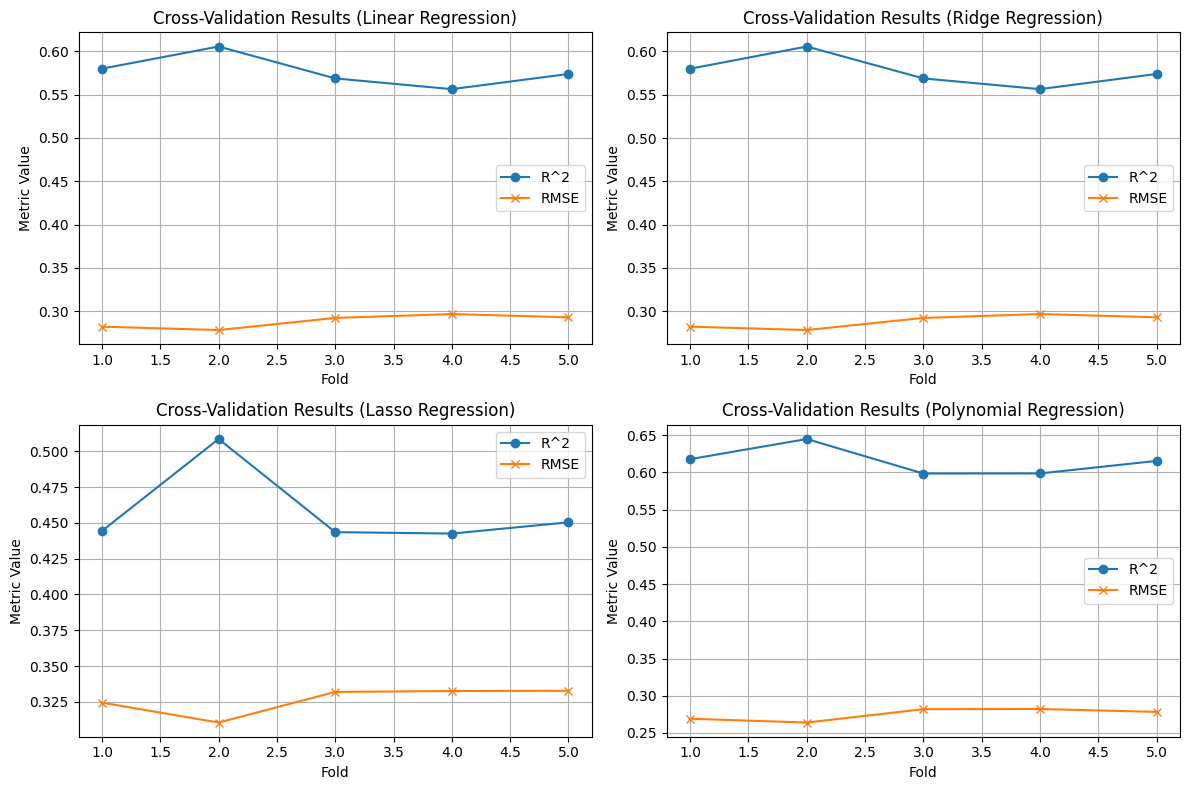

In [133]:
import matplotlib.pyplot as plt


models = {
    'Linear Regression': {'r2': [0.58005483,0.60565963 ,0.56881468, 0.55643439 ,0.57396329], 'rmse': [0.28209417, 0.27820343 ,0.29220875 ,0.29666865 ,0.2929431]},
    'Ridge Regression': {'r2': [0.58002947,0.60566937 ,0.56881431 ,0.55644649 ,0.57398358], 'rmse': [0.28210269, 0.27819999 ,0.29220887 ,0.2966646 , 0.29293612]},
    'Lasso Regression': {'r2': [0.44437297,0.5085787 , 0.44353226 ,0.44254164 ,0.45039882], 'rmse': [0.32448117, 0.31056596, 0.33195654 ,0.33258215 ,0.33272358]},
    'Polynomial Regression': {'r2': [0.61780181 ,0.64482831 ,0.59843937 ,0.59859768 ,0.61544464], 'rmse': [0.26911762 ,0.2640256, 0.281992  , 0.28221666 ,0.27831665]}
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (name, metrics) in enumerate(models.items()):
    row = i // 2
    col = i % 2

    axes[row, col].plot(range(1, len(metrics['r2']) + 1), metrics['r2'], label='R^2', marker='o')
    axes[row, col].plot(range(1, len(metrics['rmse']) + 1), metrics['rmse'], label='RMSE', marker='x')
    axes[row, col].set_title(f"Cross-Validation Results ({name})")
    axes[row, col].set_xlabel("Fold")
    axes[row, col].set_ylabel("Metric Value")
    axes[row, col].legend()

    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

Polynomial Regression Performs Best in R²:

Polynomial Regression consistently achieves the highest R² values across all folds, capturing complex patterns in the data. However, its slightly larger variability in R² might indicate overfitting to certain folds.
Ridge Regression Offers Stability:

Ridge Regression performs similarly to Linear Regression but adds stability through regularization, ensuring it handles multicollinearity effectively.
Lasso Regression Underperforms:

Lasso Regression has the lowest R² and slightly higher RMSE. This might be due to excessive regularization or poor suitability for the dataset.
Linear Regression as a Baseline:

Linear Regression performs well with minimal fluctuations in both R² and RMSE, making it a reliable baseline model.